In [2]:
import akshare as ak
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
from fund_feature_generator import FundFeatureGenerator
generator = FundFeatureGenerator(fund_code="004746")
features_df = generator.generate_all_features(target_days=10)
fea_list = generator.get_feature_columns(features_df)

生成基金特征...
获取基金004746数据，共1980条记录
获取沪深300指数数据，共5710条记录
特征生成完成，数据形状: (1904, 65)


In [10]:
df = features_df

模型评估:
MSE: 0.0004
R2 Score: 0.6889


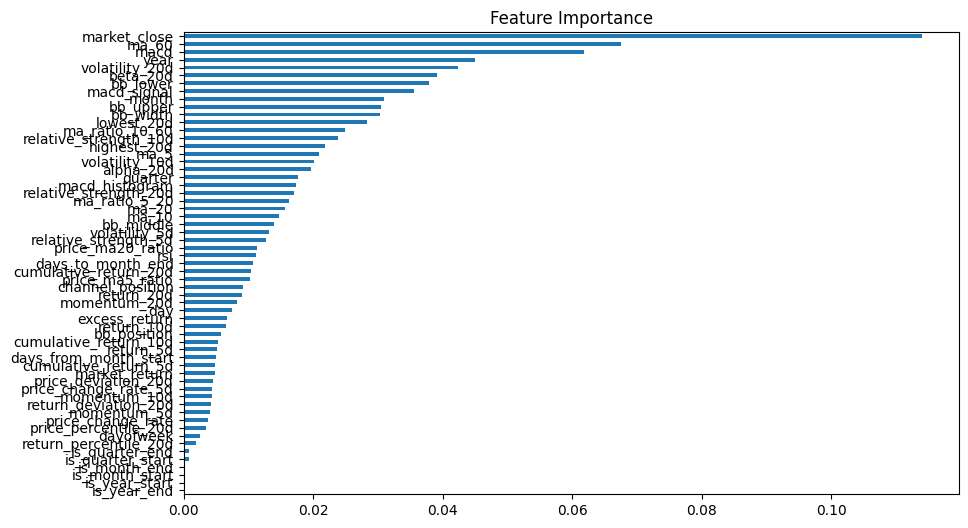

In [13]:
# 2. 特征工程
def feature_engineering(df):
    # 分离特征(X)和目标变量(y)
    X = df[fea_list]
    y = df['future_return_10d']
    
    # 特征标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y, scaler

# 3. 模型训练与评估
def train_model(X, y):
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    
    # 初始化随机森林回归模型
    model = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42
    )
    
    # 训练模型
    model.fit(X_train, y_train)
    
    # 预测评估
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"模型评估:\nMSE: {mse:.4f}\nR2 Score: {r2:.4f}")
    
    # 特征重要性可视化
    plt.figure(figsize=(10,6))
    pd.Series(model.feature_importances_, index=fea_list).sort_values().plot(kind='barh')
    plt.title('Feature Importance')
    plt.show()
    
    return model

# 主程序
if __name__ == "__main__":
    # 替换为实际数据路径
    df = features_df
    X, y, scaler = feature_engineering(df)
    model = train_model(X, y)
